# 탐색 0530



In [1]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [2]:
con1 = pd.concat([df1,df2], axis=0)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [3]:
con1 = pd.concat([df1,df2], axis=0, ignore_index=True) #인덱스 정리: ignore_index=True
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [4]:
con2 = pd.concat([df1,df2], axis=1)
con2

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [5]:
con2 = pd.concat([df1,df2], axis=1,ignore_index=True)
con2

,0,1,2,3,4,5,6,7,8
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [6]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [7]:
df2['ind'] = [1,2,3,4,5,]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [8]:
#merge()를 이용한 결함
pd.merge(df1,df2,on='ind',how='outer') #합집합 , 큰범위 기준으로 생성

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [9]:
#merge()를 이용한 결함
pd.merge(df1,df2,on='ind') #교집합, defualt는 inner , 최소기준으로 생성

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [10]:
df1 = df1.drop('ind',axis=1)
df2 = df2.drop('ind',axis=1)
print(df1, '\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [11]:
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)

NameError: name 'DataFrame' is not defined

In [ ]:
# 각 매개변수의 설명은 다음과 같습니다:

# other: 병합할 다른 DataFrame.
# on: 조인할 열 또는 인덱스 레벨 이름. 기본값은 인덱스 기준으로 병합합니다.
# how: 조인 방법을 지정합니다. 'left', 'right', 'outer', 'inner' 중 하나를 사용할 수 있습니다. 기본값은 'left'입니다.
# 'left': 왼쪽 DataFrame을 기준으로 병합.
# 'right': 오른쪽 DataFrame을 기준으로 병합.
# 'outer': 두 DataFrame의 모든 요소를 포함하는 병합.
# 'inner': 두 DataFrame의 공통 요소만 포함하는 병합.
# lsuffix: 왼쪽 DataFrame에 동일한 열 이름이 있을 때 붙일 접미사.
# rsuffix: 오른쪽 DataFrame에 동일한 열 이름이 있을 때 붙일 접미사.
# sort: 병합된 결과를 정렬할지 여부를 지정합니다. 기본값은 False입니다.

In [ ]:
#join은 "인덱스"!! 기준으로 결함(default는 기본값은 'left')
#df1.join(df2, lsuffix='_1', rsuffix='_2')
df1.join(df2, lsuffix='_1', rsuffix='_2', how='inner')

In [ ]:
df1.join(df2, lsuffix='_1', rsuffix='_2', how='outer' )

In [ ]:
import pandas as pd

filepath1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock valuation.xlsx'

df1 = pd.read_excel(filepath1, engine='openpyxl', index_col='id')
df2 = pd.read_excel(filepath2, engine='openpyxl', index_col='id')

print(df1, '\n')
print(df2)

In [ ]:
#join
#df1의 행 인덱스를 기준으로 결합하는 how=left 기준이 기본 적용, 없는건 Nan으로 표시
df3 = df1.join(df2)
print(df3)

In [ ]:
df4 = df1.join(df2, how='right')
print(df4)

In [ ]:
#교집합inner
#두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
df4 = df1.join(df2, how='inner')
print(df4)

In [ ]:
df4

Q.df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 esp가 3000보다 적거나 stoc_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5이름으로 저장 출력하세요(단, '<'와'=='를 반드시 사용)

In [ ]:
df4.drop('name', axis=1)
df4[(df4['eps']<3000) or (df4['stock_name'] == '이마트')]  #or 안됨

In [ ]:
df4.drop('name', axis=1)
df5 = df4[(df4['eps']<3000) | (df4['stock_name'] == '이마트')]
df5

In [ ]:
df4

In [ ]:
import numpy as np
data = np.arange(20).reshape(4,5)
df = pd.DataFrame(data, columns=list('abcde'))
df.head()

In [ ]:
#인덱스 삭제 방법 : drop(xx.index[i])
df1 = df.copy()
print(df1)
df1.drop(df1.index[0])

In [ ]:
df1.index[0]

In [ ]:
df1 = df.copy()
print(df1)
df1.drop(0)

In [ ]:
idx = df1[df1.a > 10].index
print(idx,'\n')
df1.drop(idx)       #drop안에 원하는 인덱스 숫자를 넣으면 삭제

In [ ]:
con1 = df.a > 10
con2 = df.b == 16
con3 = df.e > 15
print(df)
df[con1 & con2 & con3] # 해당되는 인덱스 알려줌

In [ ]:
con1 = df.a > 5
con2 = df.b == 16
con3 = df.e > 5
print(df)
df[con1 | con2 | con3]

In [ ]:
df[con1]

In [ ]:
df[con1][['a','b']]

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

In [ ]:
tdf.rename(columns={'sex':'gender', 'fare':'ticket'}, inplace=True)
tdf.head()

In [ ]:
#값 변경
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

In [ ]:
#갑변경 다른 방법
tdf1 = tdf.copy()
tdf1.gender.replace({'female':1,'male':0}, inplace=True)  #원본에 반영됨
tdf1.head()

In [ ]:
#칼럼 대문자 변경
tdf.rename(str.upper, axis='columns', inplace=True)
tdf.head()

In [ ]:
#칼럼 소문자 변경
tdf.rename(str.lower, axis='columns', inplace=True)
tdf.head()

In [ ]:
df2 = df.copy()

In [ ]:
#컬럼 순서 변경
columns_customed = ['pclass', 'sex', 'age','survived']
df2[columns_customed].head()

In [ ]:
tdf1 = tdf[['age','ticket']].head()
tdf1

In [ ]:
tdf1.info()

In [ ]:
#Dtype변경
tdf1 = tdf1.astype({'age':'int','ticket':'int'})
tdf1.info()

In [ ]:
#age컬럼의 값 구성 체크
age_counts_sorted = tdf.age.value_counts()
age_counts_sorted.sort_index()
#숫자인 나이보다 범주화가 필요

In [ ]:
#age컬럼의 고유 구성 요소
print(len(tdf.age.unique()))
tdf.age.unique()

In [ ]:
#age범주화
#baby, child, teenager, young adult, adult, Elderly
#파생변수

def get_category(age):
    if age < 5:
        return 'baby'
    elif 5<= age < 10:
        return 'child'
    elif 10<= age < 18:
        return 'teenager'
    elif 18 <= age < 30:
        return 'young adult'
    elif 30 <= age < 50:
        return 'adult'
    else:
        return 'Elderly'

tdf['age_cat'] = tdf.age.apply(lambda x: get_category(x))
tdf[['age','age_cat']].head()

In [ ]:
#cut() 사용
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf

범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용,
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용,희소행렬 방식, 밀집행렬로 바꿔서 작업수행
- 둘다 장단점이 있다.

In [ ]:
tdf.info()

In [ ]:
tdf.gender.value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['gender','age']
for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf.head()

#젠더와 에이지 레이블 인코딩됨
#젠더는 1,0으로 에이지는 정수형 숫자로 변경


In [ ]:
#원핫인코딩은 무조건 레이블 인코딩으로 숫자로 바꾸고 원핫인코딩 진행
#그러나 겟_더미즈로 간편하게 가능
tdf2 = tdf[['gender','class']]
tdf.head()

In [ ]:
import pandas as pd
pd.get_dummies(tdf2).head()
#클래스별 열 생기고 해당되는 건 True

Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()

ts.plot()
plt.title("Cumulative sum line Grahp")
plt.show()

               value       cum
2020-01-01  0.957499  0.957499
2020-01-02 -1.257320 -0.299822
2020-01-03  1.557515  1.257693
2020-01-04 -1.515919 -0.258225
2020-01-05  1.321196  1.062970


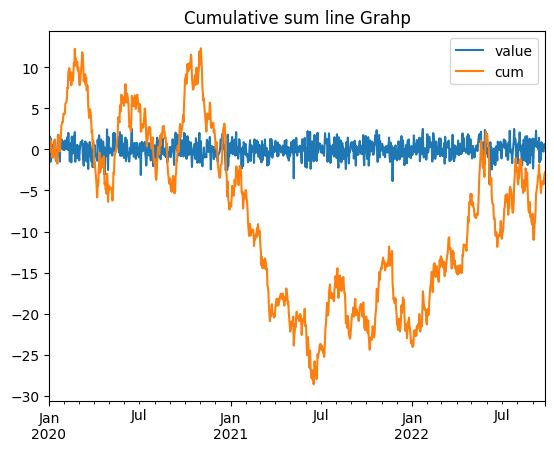

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts1 = ts.cumsum()

df = pd.DataFrame({'value': ts, 'cum':ts1})
print(df.head())
df.plot()
plt.title("Cumulative sum line Grahp")
plt.show()

In [22]:
num = np.random.randn(1000000)
mean_val = num.mean()
std_dev = num.std()
print(mean_val,std_dev)

0.000648696986744189 1.0002467828566322


              A         B
one    0.962602  0.442892
two    0.670928  0.566284
three  0.444664  0.967222
four   0.350323  0.819511
five   0.950794  0.303878


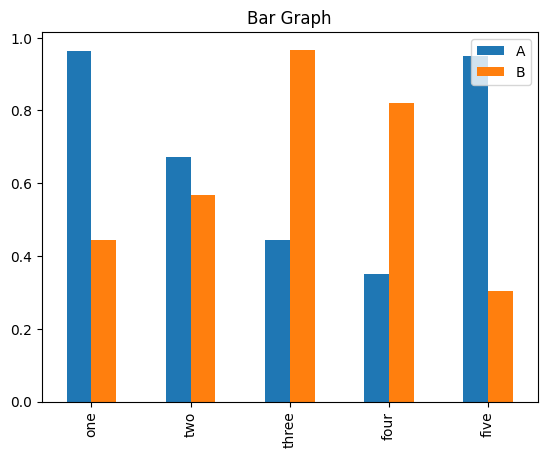

In [23]:
df = pd.DataFrame({
    'A':np.random.rand(5),
    'B':np.random.rand(5)
}, index=['one','two','three','four','five']
)
print(df)
df.plot.bar()
plt.title('Bar Graph')
plt.show()

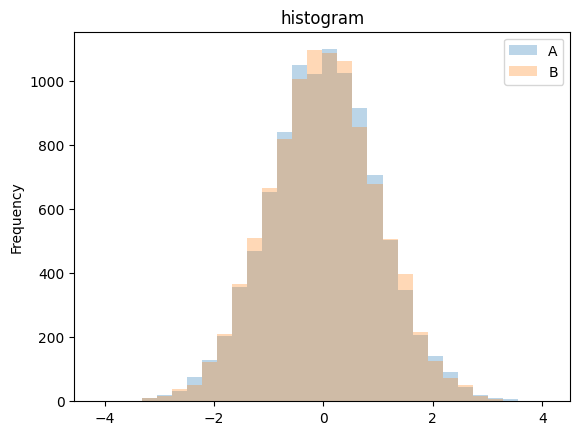

In [24]:
df = pd.DataFrame({
    'A':np.random.randn(10000),
    'B':np.random.randn(10000)
})
df.plot.hist(alpha=0.3, bins=30)
plt.title('histogram')
plt.show()

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(10000),
    'B':np.random.randn(10000)
})
df.plot.hist(alpha=0.3, bins=100)
plt.title('histogram')
plt.show()

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(10000),
    'B':np.random.randn(10000)
})

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

# 0531

          A         B         C         D         E
0  0.742331  0.696946  0.709639  0.200164  0.466964
1  0.027979  0.258087  0.410415  0.880070  0.290999
2  0.265344  0.065710  0.477604  0.378747  0.646663
3  0.010488  0.343589  0.929107  0.383382  0.399756
4  0.805670  0.951257  0.137846  0.699647  0.602028
5  0.590009  0.311778  0.061953  0.781256  0.077030
6  0.720017  0.170479  0.392318  0.828088  0.473612
7  0.004970  0.384529  0.998311  0.542527  0.446935
8  0.707117  0.398578  0.585573  0.654557  0.724564
9  0.489424  0.139616  0.516174  0.400740  0.340069 



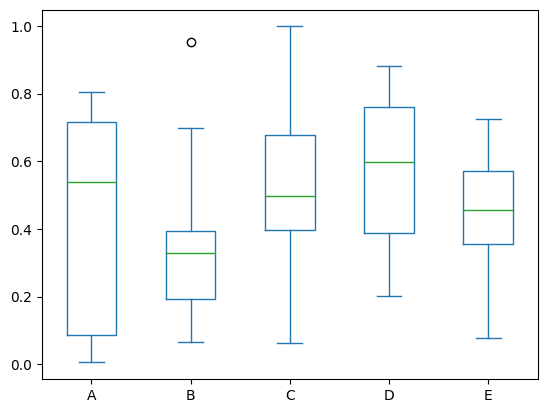

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10,5), columns=list('ABCDE'))
print(df,'\n')
df.plot.box()
plt.show()

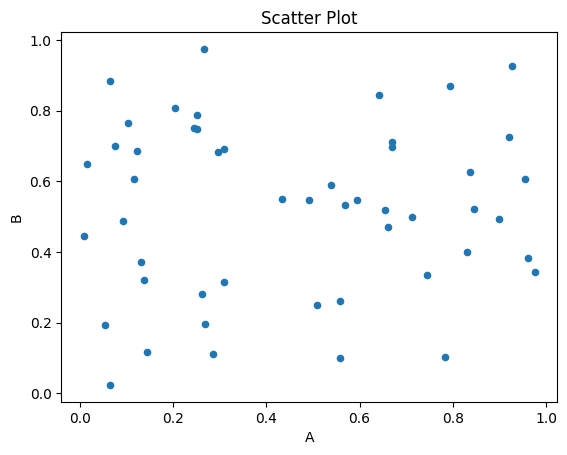

In [16]:
df = pd.DataFrame(np.random.rand(50,4), columns=list('ABCD'))
#두개 항목의 관계를 나타내는 방법
#산점도
df.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

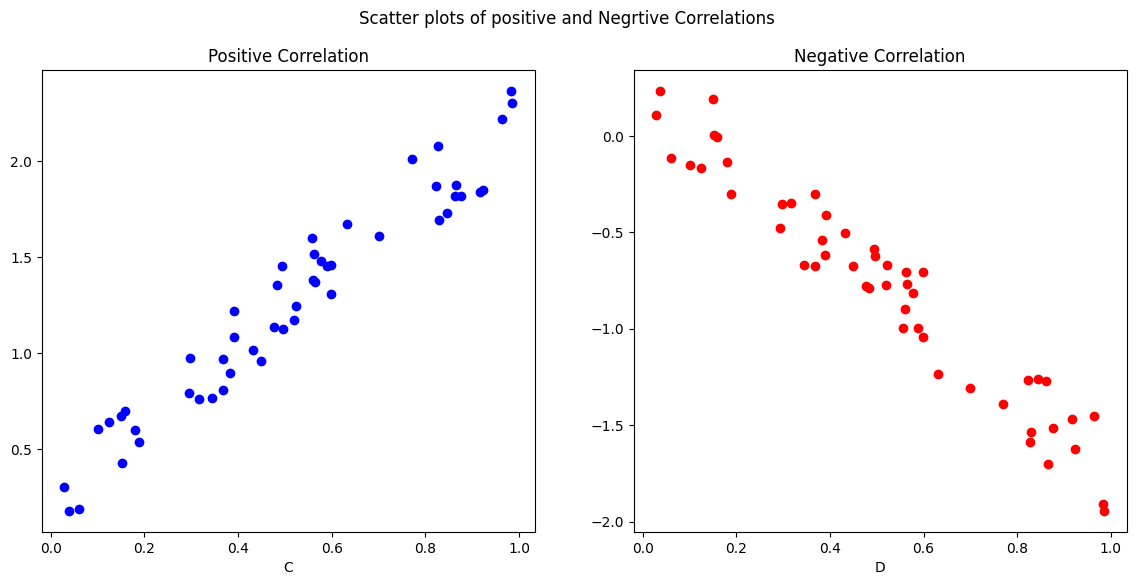

In [19]:
df = pd.DataFrame(np.random.rand(50,4), columns=list('ABCD'))
#양의 상관관계
df['C'] = df['A'] * 2 + np.random.rand(50) * 0.5
#음의 상관관계
df['D'] = -df['A'] * 2 + np.random.rand(50) * 0.5

fig, axs = plt.subplots(1,2,figsize=(14,6))

axs[0].scatter(df['A'],df['C'], color='blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_xlabel('C')


axs[1].scatter(df['A'],df['D'], color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_xlabel('D')

plt.suptitle('Scatter plots of positive and Negative Correlations')
plt.show()

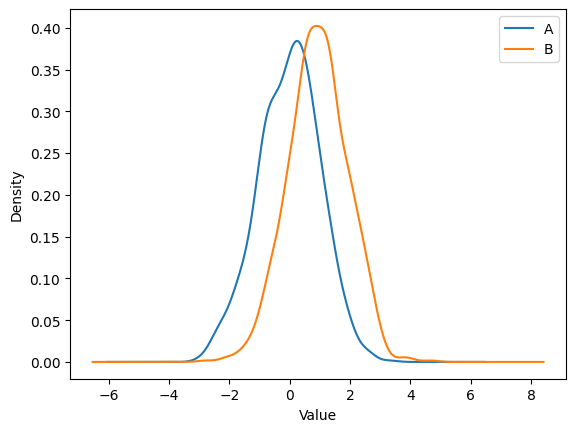

In [22]:
#커널 밀도 추정(KDE, kernel Density Estimate)그래프는 데이터의 분포를 부드럽게 나타내는 그래프
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000) + 1
})

#KDE 그래프
data['A'].plot.kde(label='A')
data['B'].plot.kde(label='B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

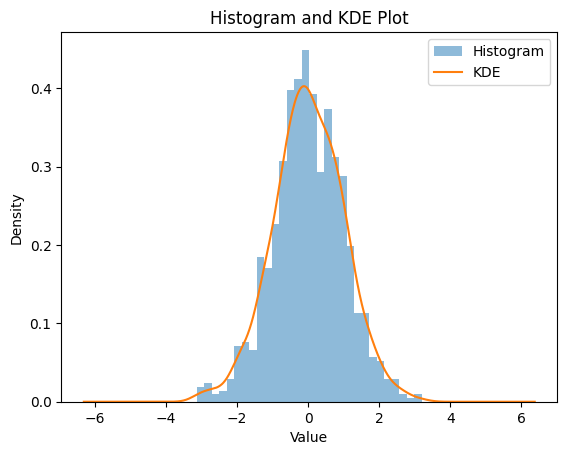

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.Series(np.random.randn(1000))

#KDE 그래프
ax = data.plot.hist(bins=30, alpha=0.5, density=True, label='Histogram')
data.plot.kde(ax=ax,label='KDE')
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.

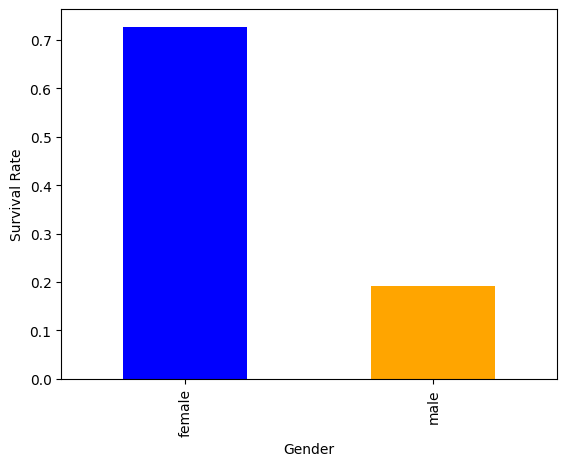

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Titanic 데이터셋 불러오기
titanic_data = pd.read_csv('titanic3.csv')

# 성별에 따른 생존율 계산
survival = titanic_data.groupby('sex')['survived'].mean()

# 막대 그래프 그리기
survival.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


sex
male      0.190985
female    0.727468
Name: survived, dtype: float64


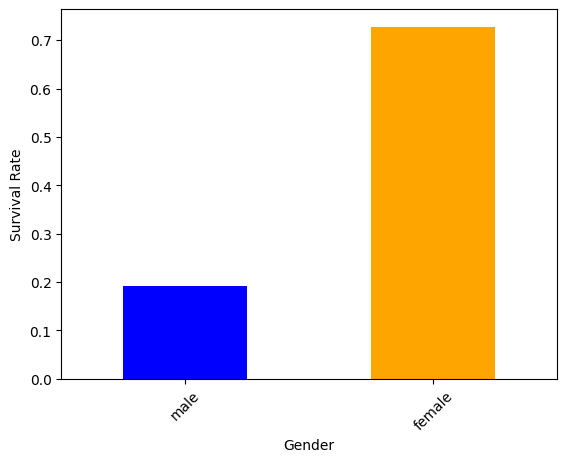

In [60]:
#ex
import pandas as pd
import matplotlib.pyplot as plt

# Titanic 데이터셋 불러오기
titanic_data = pd.read_csv('titanic3.csv')

# 성별에 따른 생존율 계산
survival = titanic_data.groupby('sex')['survived'].mean().sort_values()
print(survival)
# 막대 그래프 그리기
survival.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


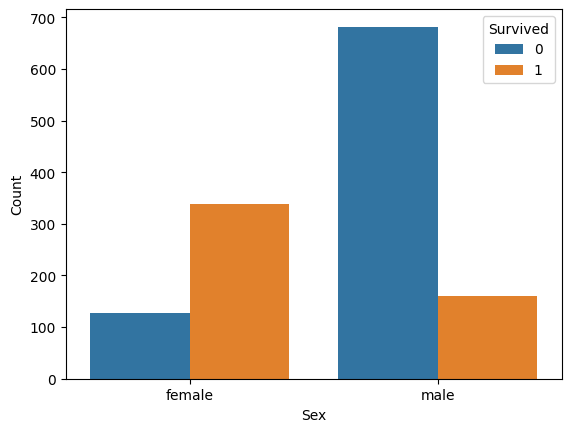

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
#판다스는 숫자 세어서 그래프 만들어주는 기능 없음

#성별과 승객(생존, 사망)수 관계 시각화
sns.countplot(x='sex', hue='survived', data=titanic_data)
plt.legend(title='Survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

pclass
3    0.255289
2    0.429603
1    0.619195
Name: survived, dtype: float64
<class 'pandas.core.series.Series'>


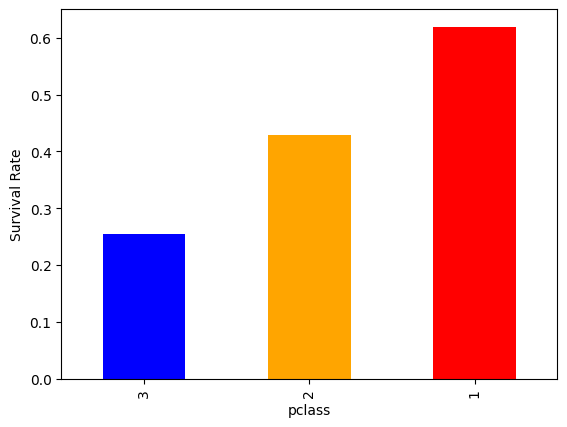

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Titanic 데이터셋 불러오기
titanic_data = pd.read_csv('titanic3.csv')

survival = titanic_data.groupby('pclass')['survived'].mean().sort_values()
print(survival)
print(type(survival))
survival.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('pclass')
plt.ylabel('Survival Rate')
plt.show()


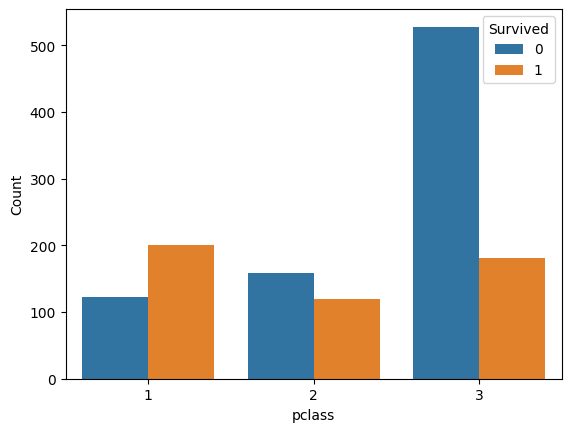

In [68]:
#ex
import seaborn as sns
import matplotlib.pyplot as plt
#판다스는 숫자 세어서 그래프 만들어주는 기능 없음

#성별과 승객(생존, 사망)수 관계 시각화
sns.countplot(x='pclass', hue='survived', data=titanic_data)
plt.legend(title='Survived')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.show()

Q. 나이와 생존율 관계를 시각화하여 출력하세요.

     age      age_cat
0  29.00  young adult
1   0.92         baby
2   2.00         baby
3  30.00        adult
4  25.00  young adult


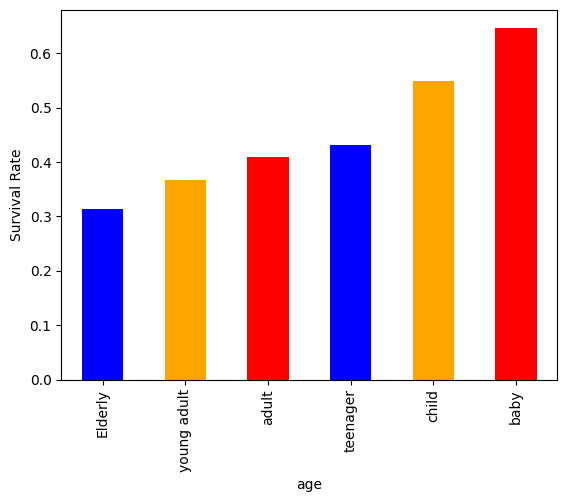

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic3.csv')

def get_category(age):
    if age < 5:
        return 'baby'
    elif 5<= age < 10:
        return 'child'
    elif 10<= age < 18:
        return 'teenager'
    elif 18 <= age < 30:
        return 'young adult'
    elif 30 <= age < 50:
        return 'adult'
    else:
        return 'Elderly'

df['age_cat'] = df.age.apply(lambda x: get_category(x))
print(df[['age','age_cat']].head())

survival = df.groupby('age_cat')['survived'].mean().sort_values()

survival.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('age')
plt.ylabel('Survival Rate')
plt.show()

age_group
(0, 10]      0.581395
(10, 20]     0.395062
(20, 30]     0.371191
(30, 40]     0.423810
(40, 50]     0.393939
(50, 60]     0.483871
(60, 70]     0.222222
(70, 80]     0.333333
(80, 90]          NaN
(90, 100]         NaN
Name: survived, dtype: float64


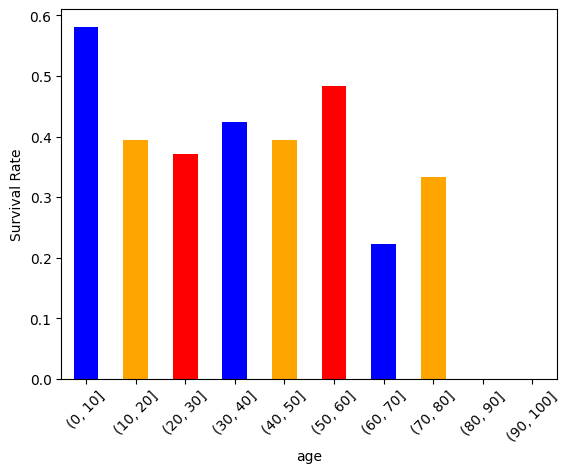

In [72]:
#ex
df['age_group'] = pd.cut(df['age'], bins=[0, 10,20,30,40,50,60,70,80,90,100])
survival = df.groupby('age_group')['survived'].mean()
print(survival)
survival.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('age')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

#(0, 10] 0초과 10포함

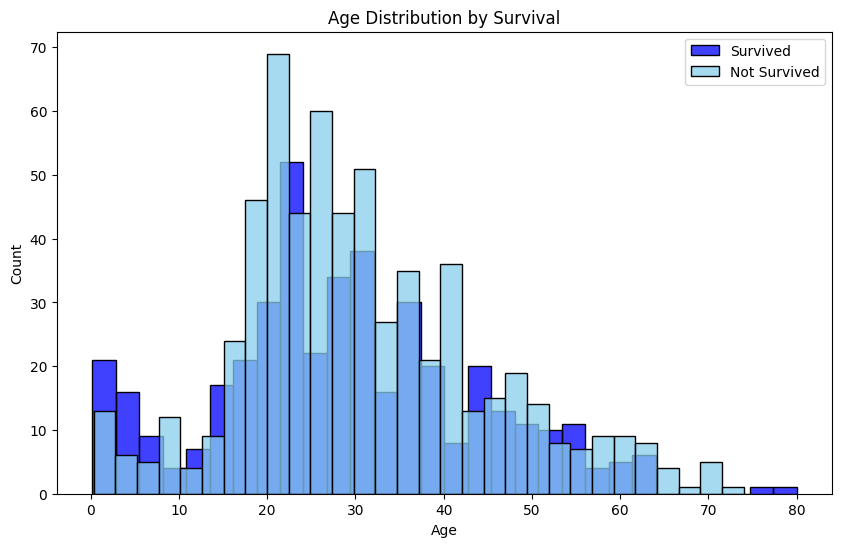

In [78]:
#나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived'] == 1]['age'], bins=30, kde=False, color='blue', label='Survived')
sns.histplot(df[df['survived'] == 0]['age'], bins=30, kde=False, color='skyblue', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

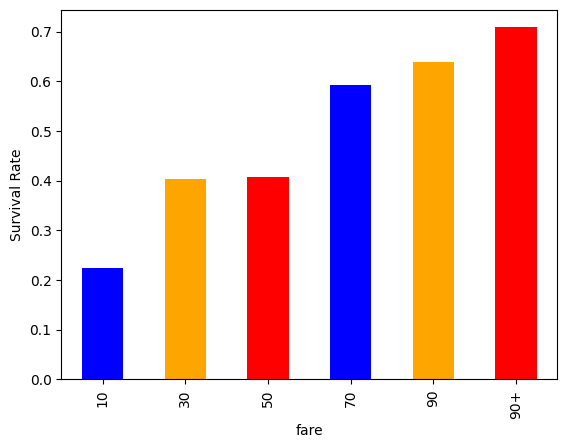

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic3.csv')

def get_category(fare):
    if fare < 10:
        return 10
    elif 10<= fare < 30:
        return 30
    elif 30<= fare < 50:
        return 50
    elif 50 <= fare < 70:
        return 70
    elif 70 <= fare < 90:
        return 90
    else:
        return '90+'

df['fare_cat'] = df.fare.apply(lambda x: get_category(x))
survival = df.groupby('fare_cat')['survived'].mean().sort_values()

survival.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('fare')
plt.ylabel('Survival Rate')
plt.show()

fare_group
(0, 50]        0.323501
(50, 100]      0.628205
(100, 150]     0.787879
(150, 200]     0.615385
(200, 300]     0.647059
(300, 350]          NaN
(350, 400]          NaN
(400, 450]          NaN
(450, 500]          NaN
(500, 1000]    1.000000
Name: survived, dtype: float64


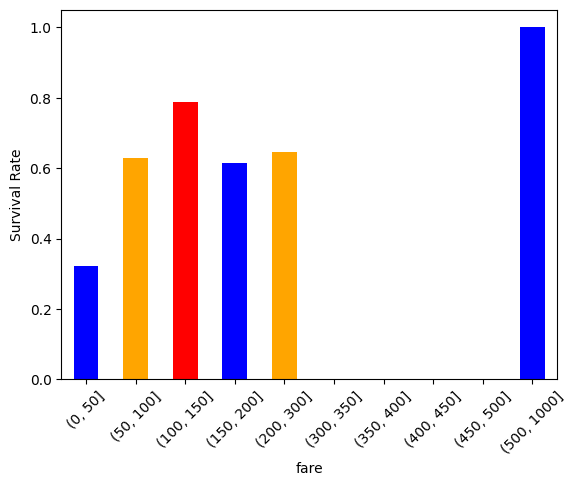

In [82]:
#ex
df['fare_group'] = pd.cut(df['fare'], bins=[0, 50,100, 150, 200,300, 350, 400, 450, 500, 1000])
survival = df.groupby('fare_group')['survived'].mean()
print(survival)
survival.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('fare')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


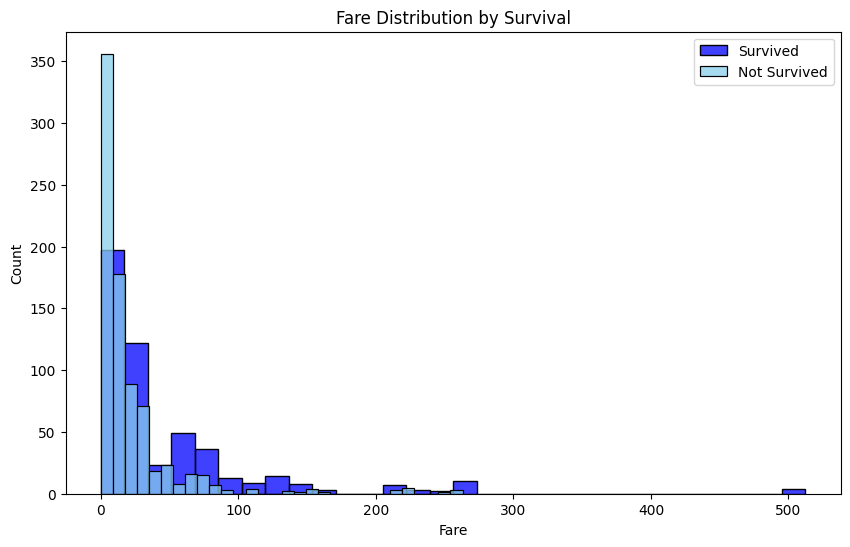

In [81]:
#요금와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived'] == 1]['fare'], bins=30, kde=False, color='blue', label='Survived')
sns.histplot(df[df['survived'] == 0]['fare'], bins=30, kde=False, color='skyblue', label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

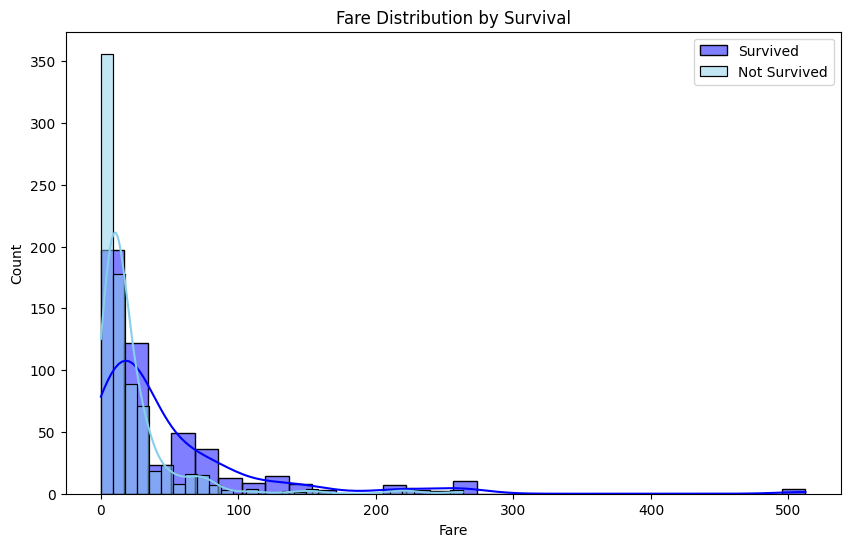

In [83]:
#요금와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived'] == 1]['fare'], bins=30, kde=True, color='blue', label='Survived')
sns.histplot(df[df['survived'] == 0]['fare'], bins=30, kde=True, color='skyblue', label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

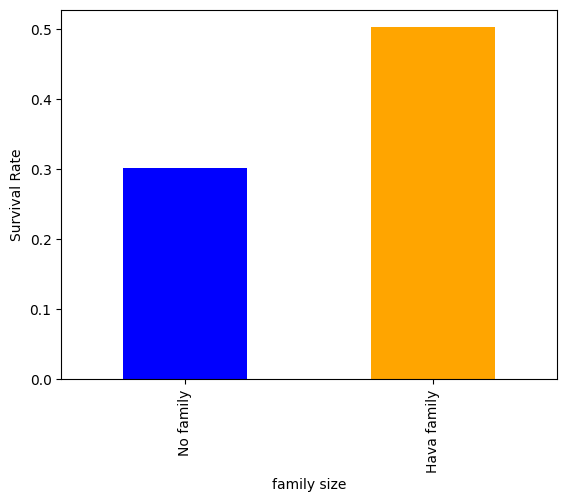

In [67]:
df
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic3.csv')
df['family_size'] = df['sibsp'] + df['parch']
#가족수가 0보다 크면 1 , 아니면 0
df['family_cat'] = df.family_size.apply(lambda x: 'Hava family' if x > 0 else 'No family')
survival = df.groupby('family_cat')['survived'].mean().sort_values()

survival.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('family size')
plt.ylabel('Survival Rate')
plt.show()

0       0
1       1
2       1
3       1
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: with_family, Length: 1309, dtype: int64
with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



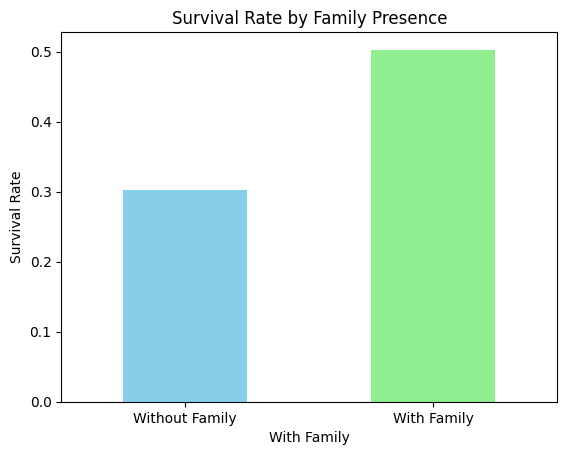

In [86]:
#ex
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)
print(df['with_family'])
# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

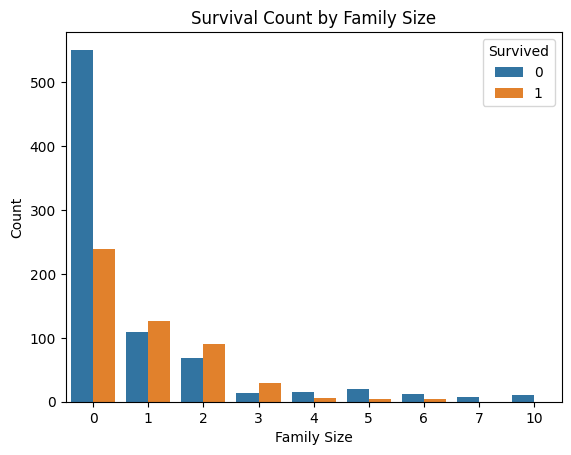

In [85]:
#ex
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()